In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN, LSTM, Bidirectional
import matplotlib.pyplot as plt

#### Data preparation:

In [2]:
max_features = 10000
maxlen = 500
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

17464789/17464789 [==============================] - 2s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


#### Creation of models:

In [3]:
model_rnn = Sequential()
model_rnn.add(Embedding(max_features, 32))
model_rnn.add(SimpleRNN(32))
model_rnn.add(Dense(1, activation='sigmoid'))

model_lstm = Sequential()
model_lstm.add(Embedding(max_features, 32))
model_lstm.add(LSTM(32))
model_lstm.add(Dense(1, activation='sigmoid'))

model_brnn = Sequential()
model_brnn.add(Embedding(max_features, 32))
model_brnn.add(Bidirectional(SimpleRNN(32)))
model_brnn.add(Dense(1, activation='sigmoid'))

model_drnn = Sequential()
model_drnn.add(Embedding(max_features, 32))
model_drnn.add(SimpleRNN(32, return_sequences=True))
model_drnn.add(SimpleRNN(32))
model_drnn.add(Dense(1, activation='sigmoid'))

models = [model_rnn, model_lstm, model_brnn, model_drnn]

#### Training models and obtaining accuracy parameters:

In [4]:
histories = []

for i, model in enumerate(models):
    print(f'Training model {i+1}...')
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
    history = model.fit(input_train, y_train,
                        epochs=10,
                        batch_size=128,
                        validation_split=0.2)
    histories.append(history)

Training model 1...
Epoch 1/10
157/157 [==============================] - 86s 532ms/step - loss: 0.6287 - acc: 0.6324 - val_loss: 0.4748 - val_acc: 0.7832
Epoch 2/10
157/157 [==============================] - 82s 525ms/step - loss: 0.4092 - acc: 0.8241 - val_loss: 0.4164 - val_acc: 0.8254
Epoch 3/10
157/157 [==============================] - 79s 505ms/step - loss: 0.3116 - acc: 0.8767 - val_loss: 0.4680 - val_acc: 0.7684
Epoch 4/10
157/157 [==============================] - 78s 496ms/step - loss: 0.2482 - acc: 0.9035 - val_loss: 0.4120 - val_acc: 0.8548
Epoch 5/10
157/157 [==============================] - 75s 480ms/step - loss: 0.1909 - acc: 0.9289 - val_loss: 0.4335 - val_acc: 0.8500
Epoch 6/10
157/157 [==============================] - 75s 479ms/step - loss: 0.1834 - acc: 0.9359 - val_loss: 0.4376 - val_acc: 0.8434
Epoch 7/10
157/157 [==============================] - 75s 480ms/step - loss: 0.1096 - acc: 0.9632 - val_loss: 0.4874 - val_acc: 0.8534
Epoch 8/10
157/157 [===============

#### Output of graphs:

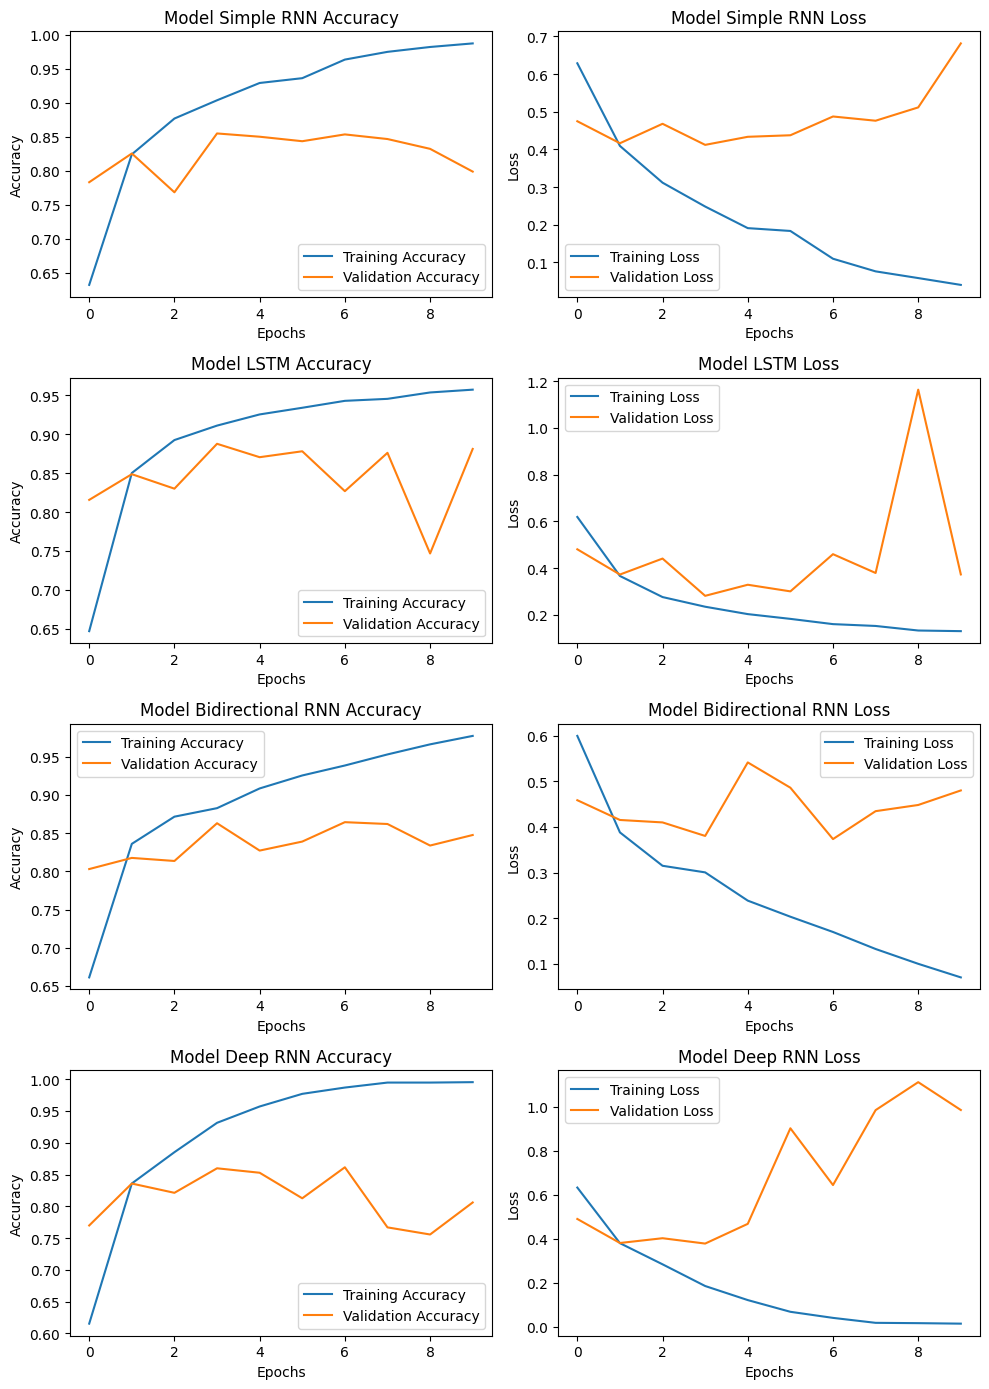

In [5]:
plt.figure(figsize=(10, 14))
model_names = ['Simple RNN', 'LSTM', 'Bidirectional RNN', 'Deep RNN']

for i, history in enumerate(histories):
    plt.subplot(4, 2, 2*i+1)
    plt.plot(history.history['acc'], label='Training Accuracy')
    plt.plot(history.history['val_acc'], label='Validation Accuracy')
    plt.title(f'Model {model_names[i]} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(4, 2, 2*i+2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model {model_names[i]} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

plt.tight_layout()
plt.show()


In [6]:
import pandas as pd

model_names = ['Simple RNN', 'LSTM', 'Bidirectional RNN', 'Deep RNN']
train_acc = []
val_acc = []
train_loss = []
val_loss = []

for history in histories:
    train_acc.append(history.history['acc'][-1])
    val_acc.append(history.history['val_acc'][-1])
    train_loss.append(history.history['loss'][-1])
    val_loss.append(history.history['val_loss'][-1])


df = pd.DataFrame({
    'Model': model_names,
    'Train Accuracy': train_acc,
    'Validation Accuracy': val_acc,
    'Train Loss': train_loss,
    'Validation Loss': val_loss
})

df.head()

,Model,Train Accuracy,Validation Accuracy,Train Loss,Validation Loss
0,Simple RNN,0.98700,0.7988,0.040096,0.681523
1,LSTM,0.95710,0.8810,0.130282,0.372920
2,Bidirectional RNN,0.97735,0.8476,0.070291,0.479942
3,Deep RNN,0.99540,0.8060,0.014164,0.984085


## SUMMARY

### Simple RNN
- Висока точність на тренувальному наборі (0.98700), значно нижче на валідаційному наборі (0.7988). Цей показник вказує на сильне перенавчання.
- Низька втрата на тренуванні (0.040096) та висока валідація (0.681523), що також підтверджує перенавчання.

### LSTM
- Гарний баланс між тренувальною (0.95710) та валідаційною (0.8810) точністю.
- Відносно низька втрата на тренуванні (0.130282) та валідації (0.372920).
- LSTM демонструє найкращу валідаційну точність серед всіх моделей, що робить її самою ефективною.

### Bidirectional RNN
- Висока точність на тренувальному наборі (0.97735) та гарна точність на валідаційному наборі (0.8476), але трохи нижча, ніж у LSTM.
- Втрата на тренуванні (0.070291) нижча, ніж у LSTM, але втрата на валідації (0.479942) вища.
- Ця модель також страждає від перенавчання, хоча й менше, ніж Simple RNN.

### Deep RNN
- Найвища точність на тренувальному наборі (0.99540) і найнижча втрата (0.8060), але дуже низька валідаційна точність (0.014164) і найвища втрата на валідації (0.984085).
- Сильне перенавчання, навіть більше, ніж у Simple RNN.

## Підсумок
- **LSTM** показує найкращі результати в контексті валідаційної точності та втрат. Це робить її найкращою моделю для класифікації рецензій в даному випадку.

- **Simple RNN** та **Deep RNN** моделі сильно перенавчені, що робить їх менш придатними для цієї задачі.

- **Bidirectional RNN** також демонструє хороші результати, але поступається LSTM у валідаційній точності.


**LSTM** показали себе найкраще завдяки своїй здатності краще обробляти довготривалі залежності в текстових даних.
